In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [11]:
files =[file for file in os.listdir(r'C:\Users\molly\Desktop\SalesDataAnalysis\csvfiles')]
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [12]:
path = r'C:\Users\molly\Desktop\SalesDataAnalysis\csvfiles'

#blank dataframe
all_data = pd.DataFrame()

for file in files:
    current_df = pd.read_csv(path+"/"+file)
    all_data = pd.concat([all_data, current_df])
    
all_data.shape

(186850, 6)

In [13]:
all_data.to_csv(r'C:\Users\molly\Desktop\SalesDataAnalysis\csvfiles/all_data.csv',index=False)

In [14]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [15]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [16]:
all_data = all_data.dropna(how='all')
all_data.shape

(186305, 6)

In [18]:
'04/19/19 08:46'.split('/')[0]

'04'

In [19]:
def month(x): 
  return x.split('/')[0]

In [20]:
all_data['month'] = all_data['Order Date'].apply(month)

In [21]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [23]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month               object
dtype: object

In [25]:
all_data['month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [26]:
filter = all_data['month'] == 'Order Date'
all_data = all_data[~filter]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [27]:
all_data['month'] = all_data['month'].astype(int)

In [28]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month                int32
dtype: object

In [30]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
all_data['Price Each'] = all_data['Price Each'].astype(float)

In [31]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
month                 int32
dtype: object

In [32]:
all_data['sales'] = all_data['Quantity Ordered']*all_data['Price Each']

In [33]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [34]:
all_data.groupby('month')['sales'].sum()

month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: sales, dtype: float64

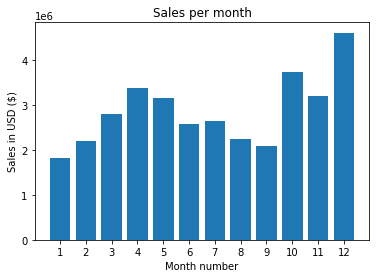

In [39]:
months=range(1,13)
plt.bar(months,all_data.groupby('month')['sales'].sum())
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.title('Sales per month')
plt.show()

### Which city has the most sales?

In [40]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [41]:
'917 1st St, Dallas, TX 75001'.split(',')

['917 1st St', ' Dallas', ' TX 75001']

In [42]:
def city(x):
    return x.split(',')[1]

In [43]:
all_data['city'] = all_data['Purchase Address'].apply(city)

In [44]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [45]:
all_data.groupby('city')['city'].count()

city
 Atlanta          14881
 Austin            9905
 Boston           19934
 Dallas           14820
 Los Angeles      29605
 New York City    24876
 Portland         12465
 San Francisco    44732
 Seattle          14732
Name: city, dtype: int64

<AxesSubplot:xlabel='city'>

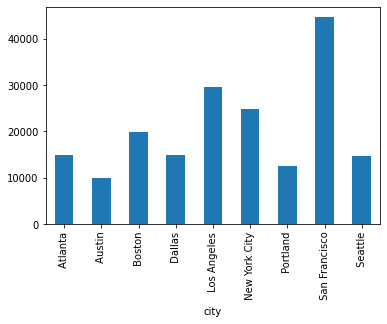

In [46]:
all_data.groupby('city')['city'].count().plot.bar()

### What time of day has the most sales? 

In [47]:
all_data['Order Date'].dtype

dtype('O')

In [48]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour

In [49]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


In [50]:
keys = []
hour = []
for key,hour_df in all_data.groupby('Hour'):
    keys.append(key)
    hour.append(len(hour_df))

In [51]:
keys

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [52]:
hour

[3910,
 2350,
 1243,
 831,
 854,
 1321,
 2482,
 4011,
 6256,
 8748,
 10944,
 12411,
 12587,
 12129,
 10984,
 10175,
 10384,
 10899,
 12280,
 12905,
 12228,
 10921,
 8822,
 6275]

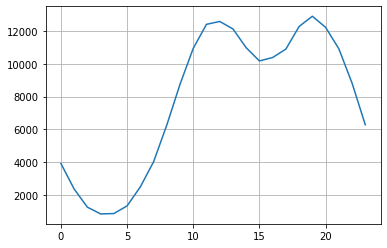

In [55]:
plt.grid()
plt.plot(keys,hour)

### What product has the highest number of sales?

In [59]:
all_data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int32

<AxesSubplot:xlabel='Product'>

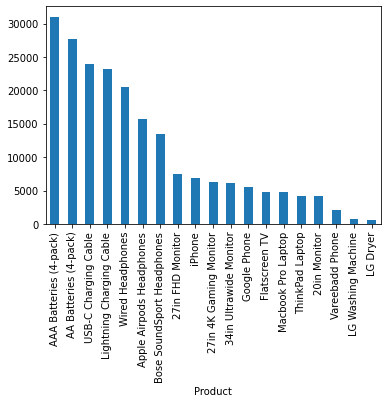

In [62]:
all_data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).plot(kind='bar')

In [63]:
all_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [64]:
products = all_data.groupby('Product')['Quantity Ordered'].sum().index
quantity = all_data.groupby('Product')['Quantity Ordered'].sum()
prices = all_data.groupby('Product')['Price Each'].mean()

C:\Users\molly\AppData\Local\Temp\ipykernel_2264\3465559762.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical',size=8)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

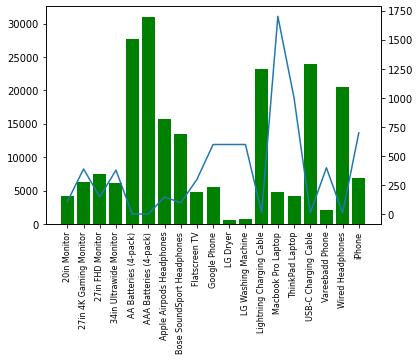

In [66]:
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products,quantity,color='g')
ax2.plot(products,prices)
ax1.set_xticklabels(products,rotation='vertical',size=8)

### What products are most often sold together?

In [67]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


In [69]:
df = all_data['Order ID'].duplicated(keep=False)
df2 = all_data[df]
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11


In [71]:
df2['Grouped'] = df2.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

C:\Users\molly\AppData\Local\Temp\ipykernel_2264\1067124067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Grouped'] = df2.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


In [72]:
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour,Grouped
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [73]:
df2 = df2.drop_duplicates(subset=['Order ID'])
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour,Grouped
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,17,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,14.95,New York City,11,"Lightning Charging Cable,USB-C Charging Cable"


In [74]:
df2['Grouped'].value_counts()

iPhone,Lightning Charging Cable                                            882
Google Phone,USB-C Charging Cable                                          856
iPhone,Wired Headphones                                                    361
Vareebadd Phone,USB-C Charging Cable                                       312
Google Phone,Wired Headphones                                              303
                                                                          ... 
Google Phone,USB-C Charging Cable,Wired Headphones,USB-C Charging Cable      1
34in Ultrawide Monitor,LG Washing Machine                                    1
20in Monitor,iPhone                                                          1
Google Phone,USB-C Charging Cable,Wired Headphones,27in FHD Monitor          1
LG Washing Machine,AA Batteries (4-pack)                                     1
Name: Grouped, Length: 366, dtype: int64

<AxesSubplot:ylabel='Grouped'>

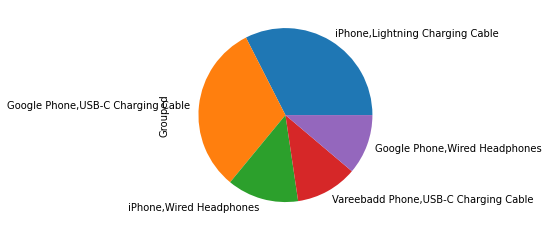

In [75]:
df2['Grouped'].value_counts()[0:5].plot.pie()